In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Load data
HD_data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
HD_data = HD_data.astype(int)
HD_data['Diabetes'] = np.where(HD_data['Diabetes'].isin([1, 2]), 1, HD_data['Diabetes'])

# Viewing DataFrame
print(HD_data.head())

# Combine columns
HD_data['Combined'] = HD_data[['Stroke', 'HeartDiseaseorAttack', 'Diabetes']].astype(str).agg('_'.join, axis=1)

# Viewing the tail of DataFrame
print(HD_data.tail())

# Printing column names
print(HD_data.columns)

# Creating factors
HD_data['HighBP'] = HD_data['HighBP'].map({0: 'No', 1: 'Yes'})
HD_data['HighChol'] = HD_data['HighChol'].map({0: 'No', 1: 'Yes'})
HD_data['CholCheck'] = HD_data['CholCheck'].map({0: 'No', 1: 'Yes'})
HD_data['Smoker'] = HD_data['Smoker'].map({0: 'No', 1: 'Yes'})
HD_data['PhysActivity'] = HD_data['PhysActivity'].map({0: 'No', 1: 'Yes'})
HD_data['Fruits'] = HD_data['Fruits'].map({0: 'No', 1: 'Yes'})
HD_data['Veggies'] = HD_data['Veggies'].map({0: 'No', 1: 'Yes'})
HD_data['HvyAlcoholConsump'] = HD_data['HvyAlcoholConsump'].map({0: 'No', 1: 'Yes'})
HD_data['AnyHealthcare'] = HD_data['AnyHealthcare'].map({0: 'No', 1: 'Yes'})
HD_data['NoDocbcCost'] = HD_data['NoDocbcCost'].map({0: 'No', 1: 'Yes'})
HD_data['DiffWalk'] = HD_data['DiffWalk'].map({0: 'No', 1: 'Yes'})
HD_data['Sex'] = HD_data['Sex'].map({0: 'Male', 1: 'Female'})

# Create contingency tables
def create_contingency_table(df, category):
    contingency_table = df.groupby('Combined')[category].value_counts().unstack().fillna(0)
    total = contingency_table.sum(axis=1)
    percentages = (contingency_table.div(total, axis=0) * 100).add_prefix(f"{category}_percentage_")
    return pd.concat([contingency_table, percentages, total.rename('Total')], axis=1)

# Generate all contingency tables
categories = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
tables = {cat: create_contingency_table(HD_data, cat) for cat in categories}

# Print an example of a contingency table
print(tables['HighBP'])


   HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       0  ...              1            0        5   
1         0             1       0  ...              0            1        3   
2         0             0       1  ...              1            1        5   
3         0             1       1  ...              1            0        2   
4         0             1       1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  

Actual columns in dataframe: ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Combined']
Missing columns (specified but not in dataframe): []
Extra columns (in dataframe but not specified): ['HeartDiseaseorAttack', 'Stroke', 'Diabetes', 'Combined']


Entropy of Combined: 0.889623575276084
Conditional Entropy of Combined given Smoker: 0.9731105694004746


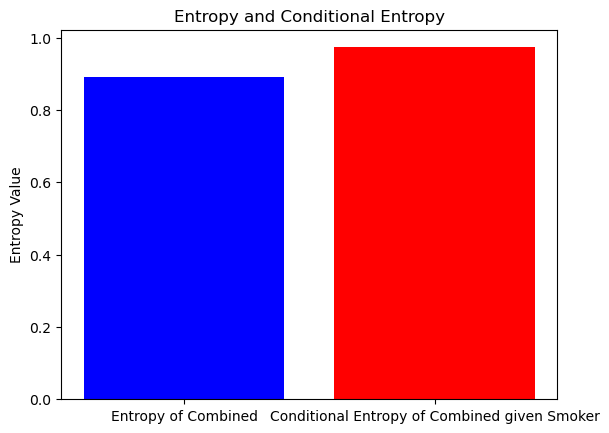

In [39]:
# Assuming HD_data is already a pandas DataFrame
HD_data['HighBP'] = HD_data['HighBP'].astype('category')
HD_data['HighChol'] = HD_data['HighChol'].astype('category')

# Assuming HD_data is already loaded with 'Combined' and 'Smoker' as categorical
HD_data['Combined'] = pd.Categorical(HD_data['Combined'])
HD_data['Smoker'] = pd.Categorical(HD_data['Smoker'])

# Calculate probabilities
combined_counts = HD_data['Combined'].value_counts(sort=False)
smoker_probs = HD_data['Smoker'].value_counts(normalize=True, sort=False)

# Calculate entropy of 'Combined'
combined_probs = combined_counts / combined_counts.sum()
entropy_combined = entropy(combined_probs, base=np.e)

# Calculate joint probability distribution for 'Combined' and 'Smoker'
joint_probs = pd.crosstab(HD_data['Combined'], HD_data['Smoker'], normalize=True)

# Correct alignment for expanded_smoker_probs with the structure of joint_probs
# Creating a repeat array that matches the rows in joint_probs
expanded_smoker_probs = np.concatenate([np.full((joint_probs.shape[0],), p) for p in smoker_probs])

# Calculate conditional entropy of 'Combined' given 'Smoker'
joint_probs_flat = joint_probs.values.flatten()
conditional_entropy = np.sum(joint_probs_flat * np.log(joint_probs_flat / expanded_smoker_probs))
conditional_entropy = -conditional_entropy  # Convert to positive, as entropy should be non-negative

# Print entropies
print("Entropy of Combined:", entropy_combined)
print("Conditional Entropy of Combined given Smoker:", conditional_entropy)

# Plot the entropy values
entropy_values = [entropy_combined, conditional_entropy]
labels = ['Entropy of Combined', 'Conditional Entropy of Combined given Smoker']

plt.bar(labels, entropy_values, color=['blue', 'red'])
plt.title('Entropy and Conditional Entropy')
plt.ylabel('Entropy Value')
plt.show()

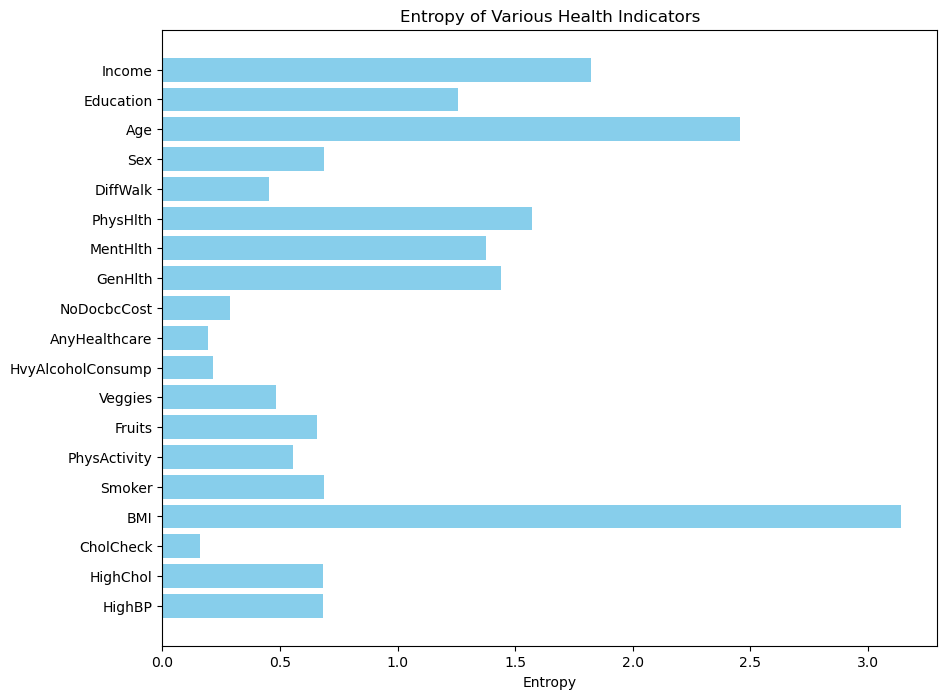

In [42]:
# Assuming the HD_data dataframe is already loaded with the correct data and columns

# List of all columns that are predictors in the dataset
categories = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'PhysActivity', 
              'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
              'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Function to calculate entropy for a variable
def calculate_entropy(data, variable):
    counts = data[variable].value_counts(normalize=True, sort=False)
    return entropy(counts, base=np.e)

# Calculate entropy for all variables
entropy_values = {var: calculate_entropy(HD_data, var) for var in categories}

# Plotting the entropies
plt.figure(figsize=(10, 8))
plt.barh(list(entropy_values.keys()), list(entropy_values.values()), color='skyblue')
plt.xlabel('Entropy')
plt.title('Entropy of Various Health Indicators')
plt.show()

